# Import Library dan Dataset

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [7]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
x = df.drop("salary", axis=1)
y = df["salary"]

# Encoding

In [11]:
x = pd.get_dummies(x)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

# Split

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f'Panjang x train : {len(x_train)}\n')
print(f'Panjang x test : {len(x_test)}\n')
print(f'Panjang y train : {len(y_train)}\n')
print(f'Panjang y test : {len(y_test)}\n')

Panjang x train : 22775

Panjang x test : 9762

Panjang y train : 22775

Panjang y test : 9762



# Standarisasi

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled_train = ss.fit_transform(x_train)
x_scaled_test = ss.fit_transform(x_test)

In [17]:
x.info

<bound method DataFrame.info of        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40

# Modeling

In [18]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()

#Input Layer
model.add(Dense(16, activation = 'relu', input_dim=108))

#Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))

# Callbacks

In [19]:
from keras.callbacks import EarlyStopping

monitor_callbacks = EarlyStopping(
    monitor='val_accuracy',
    patience=10) #untuk menghentikan 5 epoch berikutnya

# Compiling

In [20]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

model.compile(
    optimizer='Adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

# Training

In [21]:
training_model = model.fit(
        x = x_scaled_train,
        y = y_train,
        validation_data=(x_scaled_test, y_test),
        epochs=100,
        verbose=1,
        callbacks=[monitor_callbacks]
)

Epoch 1/100
712/712 [==============================] - 4s 4ms/step - loss: 0.3744 - accuracy: 0.8243 - val_loss: 0.3293 - val_accuracy: 0.8485
Epoch 2/100
712/712 [==============================] - 2s 3ms/step - loss: 0.3284 - accuracy: 0.8454 - val_loss: 0.3163 - val_accuracy: 0.8566
Epoch 3/100
712/712 [==============================] - 2s 3ms/step - loss: 0.3189 - accuracy: 0.8472 - val_loss: 0.3136 - val_accuracy: 0.8576
Epoch 4/100
712/712 [==============================] - 2s 3ms/step - loss: 0.3139 - accuracy: 0.8498 - val_loss: 0.3141 - val_accuracy: 0.8583
Epoch 5/100
712/712 [==============================] - 2s 3ms/step - loss: 0.3104 - accuracy: 0.8520 - val_loss: 0.3142 - val_accuracy: 0.8556
Epoch 6/100
712/712 [==============================] - 3s 4ms/step - loss: 0.3076 - accuracy: 0.8548 - val_loss: 0.3110 - val_accuracy: 0.8596
Epoch 7/100
712/712 [==============================] - 2s 3ms/step - loss: 0.3053 - accuracy: 0.8546 - val_loss: 0.3108 - val_accuracy: 0.8582

# Evaluasi

In [22]:
model.evaluate(x_scaled_test, y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8552


[0.3332268297672272, 0.8551526069641113]

# Menampilkan Grafik loss

Text(0, 0.5, 'loss')

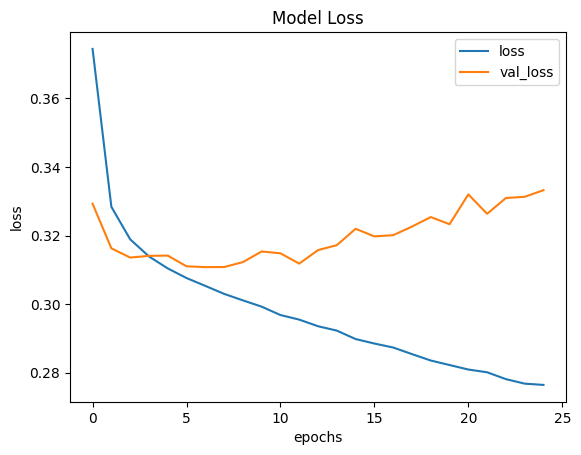

In [23]:
import matplotlib.pyplot as plt

plt.plot(training_model.history["loss"], label="loss")
plt.plot(training_model.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("loss")

# Menampilkan Grafik Accuracy

Text(0, 0.5, 'accuracy')

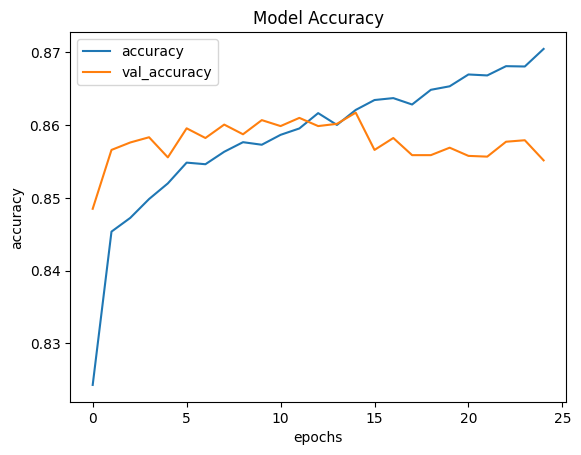

In [24]:
plt.plot(training_model.history["accuracy"], label="accuracy")
plt.plot(training_model.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")